In [1]:
import tensorflow as tf
from utils import get_filenames, train_dev_split
from pipeline import input_fn
from denoising_model import model_fn
from visualize import plot_decoder_out, plot_some_imgs

%matplotlib inline

In [2]:
TRAIN_DATA_DIR = './datasets/train/'
DEV_DATA_DIR = './datasets/devset/'

IMG_SIZE = (32, 32)
BATCH_SIZE = 16
BUFFER_SIZE = 2000
EPOCHS = 10

LATENT_DIMS = 20

In [3]:
train_dev_split(TRAIN_DATA_DIR, DEV_DATA_DIR)

Moving 5000 files


In [3]:
STEPS = EPOCHS * (len(get_filenames(TRAIN_DATA_DIR, shuffle=True)) // BATCH_SIZE)

In [4]:
print('Number of Steps: {}\tBatches Per Epoch: {}\tNumber of Epochs: {}'.format(
    STEPS, STEPS // EPOCHS, EPOCHS))

Number of Steps: 28120	Batches Per Epoch: 2812	Number of Epochs: 10


Displaying 100 images


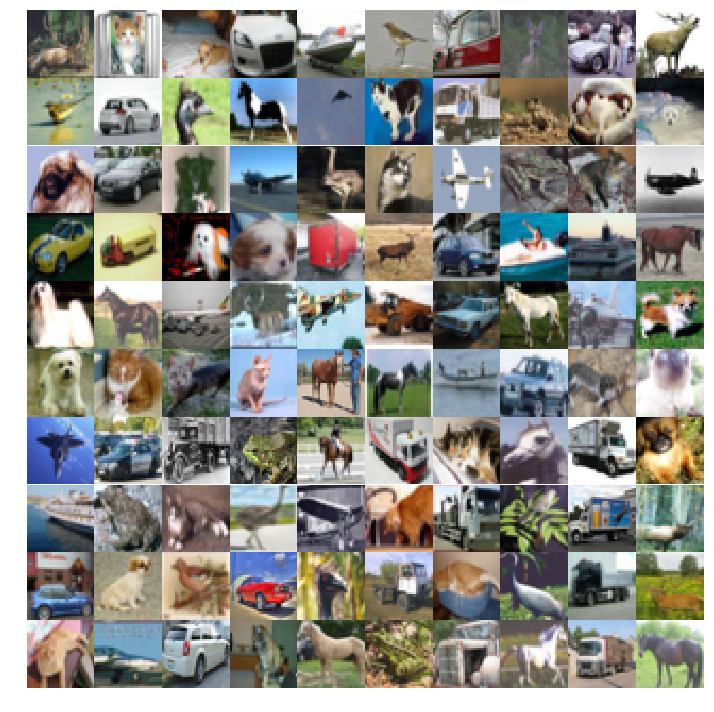

In [5]:
plot_some_imgs(TRAIN_DATA_DIR)

In [10]:
dae = tf.estimator.Estimator(model_fn=model_fn,
                             params={'latent_dims': LATENT_DIMS,
                                     'batch_size': BATCH_SIZE,
                                     'out_channels': 3,
                                     'steps_per_epoch': STEPS // EPOCHS,
                                     'decay_steps': STEPS // 20,
                                     'lr_decay': False,
                                     'is_vae': True,
                                     'lr': 0.0009},
                             model_dir='./dae_vae')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_model_dir': './dae_vae', '_log_step_count_steps': 100, '_session_config': None, '_train_distribute': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcf77c4a550>, '_num_worker_replicas': 1, '_is_chief': True, '_save_checkpoints_steps': None, '_global_id_in_cluster': 0, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_save_summary_steps': 100, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_save_checkpoints_secs': 600}


In [11]:
dae.train(input_fn=lambda: input_fn(get_filenames(TRAIN_DATA_DIR),
                                    IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    buffer_size=BUFFER_SIZE),
          steps=STEPS)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae_vae/model.ckpt-56240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 56241 into ./dae_vae/model.ckpt.
INFO:tensorflow:loss = 1818.3953, step = 56240
INFO:tensorflow:global_step/sec: 13.7723
INFO:tensorflow:loss = 1934.5509, step = 56340 (7.263 sec)
INFO:tensorflow:global_step/sec: 16.2754
INFO:tensorflow:loss = 1860.3424, step = 56440 (6.144 sec)
INFO:tensorflow:global_step/sec: 16.3303
INFO:tensorflow:loss = 1855.8611, step = 56540 (6.125 sec)
INFO:tensorflow:global_step/sec: 16.2616
INFO:tensorflow:loss = 1877.436, step = 56640 (6.149 sec)
INFO:tensorflow:global_step/sec: 16.5249
INFO:tensorflow:loss = 1833.2578, step = 56740 (6.050 sec)
INFO:tensorflow:global_step/sec: 16.4951
INFO:tensorflow:loss = 1970.9592, s

In [12]:
dae.evaluate(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                       IMG_SIZE,
                                       batch_size=BATCH_SIZE,
                                       buffer_size=BUFFER_SIZE,
                                       shuffle=False,
                                       repeat=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-22-18:40:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae_vae/model.ckpt-84360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-22-18:41:22
INFO:tensorflow:Saving dict for global step 84360: global_step = 84360, loss = 1879.5123


{'global_step': 84360, 'loss': 1879.5123}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae_vae/model.ckpt-84360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


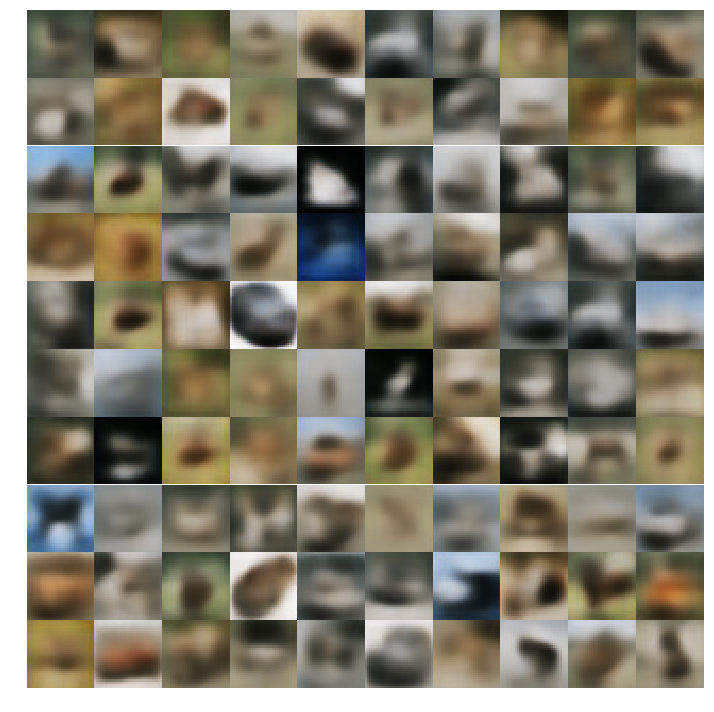

In [13]:
preds = dae.predict(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                              IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              buffer_size=BUFFER_SIZE,
                                              shuffle=False,
                                              repeat=False))
plot_decoder_out(preds)

In [14]:
dae.evaluate(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                       IMG_SIZE,
                                       noising_ratio=0.2,
                                       batch_size=BATCH_SIZE,
                                       buffer_size=BUFFER_SIZE,
                                       shuffle=False,
                                       repeat=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-22-18:41:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae_vae/model.ckpt-84360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-22-18:41:44
INFO:tensorflow:Saving dict for global step 84360: global_step = 84360, loss = 1866.1384


{'global_step': 84360, 'loss': 1866.1384}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae_vae/model.ckpt-84360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


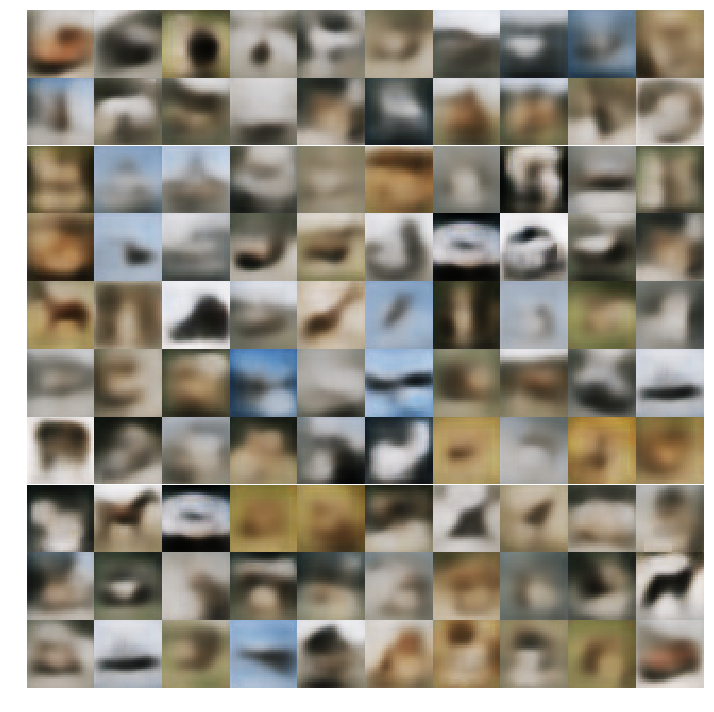

In [15]:
preds = dae.predict(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                              IMG_SIZE,
                                              noising_ratio=0.2,
                                              batch_size=BATCH_SIZE,
                                              buffer_size=BUFFER_SIZE,
                                              shuffle=False,
                                              repeat=False))
plot_decoder_out(preds)

In [16]:
dae.evaluate(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                       IMG_SIZE,
                                       noising_ratio=0.,
                                       batch_size=BATCH_SIZE,
                                       buffer_size=BUFFER_SIZE,
                                       shuffle=False,
                                       repeat=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-22-18:41:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae_vae/model.ckpt-84360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-22-18:42:04
INFO:tensorflow:Saving dict for global step 84360: global_step = 84360, loss = 2019.9193


{'global_step': 84360, 'loss': 2019.9193}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae_vae/model.ckpt-84360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


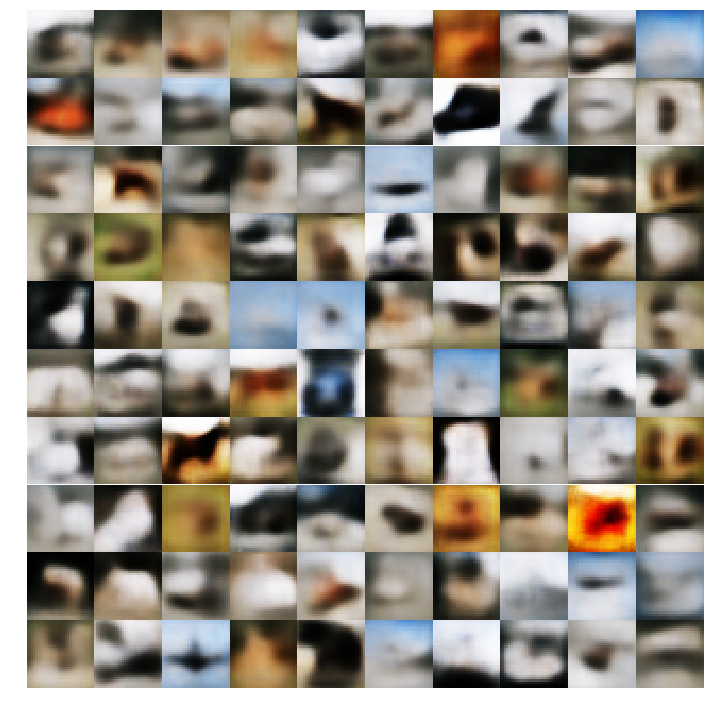

In [17]:
preds = dae.predict(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                              IMG_SIZE,
                                              noising_ratio=0.,
                                              batch_size=BATCH_SIZE,
                                              buffer_size=BUFFER_SIZE,
                                              shuffle=False,
                                              repeat=False))
plot_decoder_out(preds)